In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

In [2]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N,1))
y = true_b + true_w * x + epsilon

In [3]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for tain
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transfrom them
# into Pytorch tensors and then send them to the
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [5]:
device

'cuda'

In [6]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

NVIDIA GeForce RTX 3060


In [7]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

tensor([0.7713], device='cuda:0', dtype=torch.float64)

In [8]:
# First
# Initialize perameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1,requires_grad=True, dtype=torch.float )
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b,w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [9]:
# FINAL
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b,w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


In [10]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
error = (yhat - y_train_tensor)
# It's a regression, so it computes mean squire error (MSE)
loss = (error ** 2).mean()

# step 3 - Computes gradients for both "b" and "w" parameters
loss.backward()

In [11]:
print(error.requires_grad, yhat.requires_grad, b.requires_grad, w.requires_grad)
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

True True True True
False False


In [12]:
print(b.grad, w.grad)

tensor([-3.3881], device='cuda:0') tensor([-1.9439], device='cuda:0')


In [13]:
b.grad.zero_(), w.grad.zero_()

(tensor([0.], device='cuda:0'), tensor([0.], device='cuda:0'))

In [14]:
lr = 0.1

torch.manual_seed(42)
b = torch.randn(1,requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)


# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    yhat = b + w * x_train_tensor
    error = (yhat - y_train_tensor)
    loss = (error ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
        b.grad.zero_()
        w.grad.zero_()
  
print(b,w)


tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


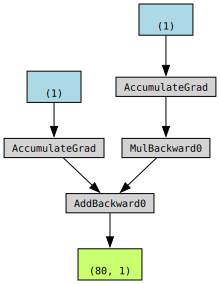

In [15]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = b + w * x_train_tensor
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()
make_dot(yhat)

In [16]:
lr = 0.1

torch.manual_seed(42)
b = torch.randn(1,requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimier to update the parameter
optimizer = optim.SGD([b, w], lr=lr)
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    yhat = b + w * x_train_tensor
    error = (yhat - y_train_tensor)
    loss = (error ** 2).mean()
    loss.backward()
    # with torch.no_grad():
    #     b -= lr * b.grad
    #     w -= lr * w.grad
    #     b.grad.zero_()
    #     w.grad.zero_()
    optimizer.step()
    optimizer.zero_grad()
print(b,w)


tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [17]:
lr = 0.1

torch.manual_seed(42)
b = torch.randn(1,requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimier to update the parameter
optimizer = optim.SGD([b, w], lr=lr)

# Defines an MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor

    # step 2 - Computes the loss
    # No more manual loss! 
    # error = (yhat - y_train_tensor)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updated parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
print(b,w)


tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [18]:
loss

tensor(0.0080, device='cuda:0', grad_fn=<MseLossBackward0>)

In [19]:
loss.detach().cpu().numpy()

array(0.00804466, dtype=float32)

In [20]:
print(loss.item(), loss.tolist())

0.008044655434787273 0.008044655434787273


In [21]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.b = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

    def forward(self,x):
        # Computes the outputs / predictions
        return self.b + self.w * x

In [22]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegress model
dummy = ManualLinearRegression()
list(dummy.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [24]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [25]:
lr = 0.1

# step 0 - Initialize parameters "b" and "w" randomly
torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)

# Defines a SGD optimier to update the parameter
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines an MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    model.train()
    
    # step 1 - Computes model's predicted output - forward pass
    yhat = model(x_train_tensor)

    # step 2 - Computes the loss
    # No more manual loss! 
    # error = (yhat - y_train_tensor)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updated parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

# We can alse inpsect its parameters using its state_dict
print(model.state_dict())


OrderedDict([('b', tensor([1.0235], device='cuda:0')), ('w', tensor([1.9690], device='cuda:0'))])


In [26]:
class MyLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # self.b = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        # self.w = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        # Instead of out custom paramters, we use a linear model
        # with a single input and single output
        self.linear = nn.Linear(1,1)

    def forward(self,x):
        # Computes the outputs / predictions
        # return self.b + self.w * x
        self.linear(x)

In [27]:
torch.manual_seed(42)
dummy = MyLinearRegression().to(device)
list(dummy.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [28]:
dummy.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

Makedown

In [29]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential mode
model = nn.Sequential(nn.Linear(1,1)).to(device)
model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')),
             ('0.bias', tensor([0.8300], device='cuda:0'))])

In [31]:
torch.manual_seed(42)
# Building the model fromt he figure above
model = nn.Sequential(nn.Linear(3,5), nn.Linear(5,1)).to(device)
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('1.bias', tensor([-0.2062], device='cuda:0'))])

In [32]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3,5))
model.add_module('layer2', nn.Linear(5,1))
model.to(device)

Sequential(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [35]:
%%writefile data_preparation/v0.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

%run -i data_preparation/v0.py

Writing data_preparation/v0.py


In [36]:
%%writefile model_configuration/v0.py

# This is redundant now, but it won't be when we introduce
# Datasets...
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Set learning rate - this is "eta"
lr = 0.1

torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1,1)).to(device)

# Defines an SGD optimizer to update the paramters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Definese an MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Writing model_configuration/v0.py


In [37]:
%run -i model_configuration/v0.py

In [38]:
%%writefile model_training/v0.py

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Set model to TRAIN mode
    model.train()
    # Step 1- Computes model's predicted output - forward parss
    yhat = model(x_train_tensor)
    # Step 2 = Computes the loss
    loss = loss_fn(yhat, y_train_tensor)
    # Step 3 - Computes gradients for both "b" and "w" paramters
    loss.backward()
    # Step 4 - Updats parameters using gradients and the learning rate
    optimizer.step()
    optimizer.zero_grad()

Writing model_training/v0.py


In [39]:
%run -i model_training/v0.py

In [40]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
